In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import cPickle as pickle
import _pickle as pickle

np.random.seed(20160703)
tf.set_random_seed(20160703)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
with open('ORENIST.data', 'rb') as file:
#     images, labels = pickle.load(file)
    images, labels = pickle.load(file, encoding='bytes')

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,2],stddev=0.1))
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv-0.2)

h_pool = tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')

In [4]:
h_pool_flat = tf.reshape(h_pool,[-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None,3])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:images, t:labels})
        print ('step: %d, loss: %f, accuracy: %f' % (i, loss_val, acc_val))

step: 10, loss: 98.618591, accuracy: 0.644444
step: 20, loss: 98.038139, accuracy: 0.677778
step: 30, loss: 97.233788, accuracy: 0.722222
step: 40, loss: 96.181183, accuracy: 0.811111
step: 50, loss: 94.913757, accuracy: 0.833333
step: 60, loss: 93.212646, accuracy: 0.877778
step: 70, loss: 91.002678, accuracy: 0.922222
step: 80, loss: 88.412369, accuracy: 0.955556
step: 90, loss: 85.766693, accuracy: 0.955556
step: 100, loss: 83.228378, accuracy: 0.977778
step: 110, loss: 80.836937, accuracy: 0.988889
step: 120, loss: 78.676086, accuracy: 1.000000
step: 130, loss: 76.683273, accuracy: 1.000000
step: 140, loss: 74.864006, accuracy: 1.000000
step: 150, loss: 73.193794, accuracy: 1.000000
step: 160, loss: 71.621918, accuracy: 1.000000
step: 170, loss: 70.129677, accuracy: 1.000000
step: 180, loss: 68.704201, accuracy: 1.000000
step: 190, loss: 67.337036, accuracy: 1.000000
step: 200, loss: 66.022026, accuracy: 1.000000


In [8]:
filter_vals, conv_vals, pool_vals = sess.run([W_conv, h_conv_cutoff, h_pool], feed_dict={x:images[:9]})

In [9]:
fig = plt.figure(figsize=(10,3))

v_max = np.max(conv_vals)

for i in range(2):
    subplot = fig.add_subplot(3,10,10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')
    
v_max = np.max(conv_vals)

for i in range(9):
    subplot = fig.add_subplot(3,10,i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3,10,10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3,10,20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    

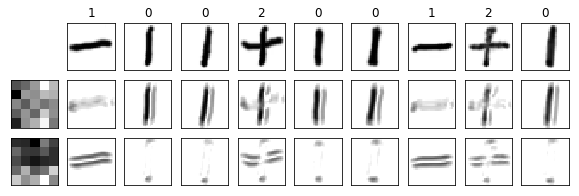

In [10]:
fig

In [11]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3,10,10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')
    
v_max = np.max(pool_vals)

for i in range(9):
    subplot = fig.add_subplot(3,10,i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3,10,10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3,10,20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    

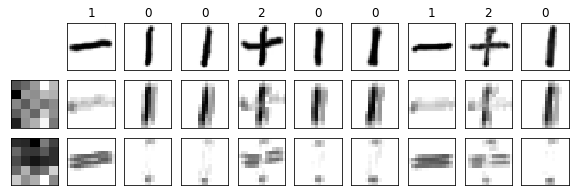

In [12]:
fig